In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
data.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
data.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [9]:
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',100)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [11]:
pd.to_numeric(data['Exited'])

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### EDA

In [12]:
# Target var
df_target = ["Exited"]

# 고객 개인정보  
df_customer= ['gender','CustomerId', 'Surname','Gender','Age' ]

# 서비스관련 데이터 
df_services= ['Geography','Tenure','Balance','NumOfProducts','IsActiveMember',
      'EstimatedSalary','Complain','Card Type']

# 지불관련 정보
df_pay = ['CreditScore','HasCrCard','Satisfaction Score','Point Earned']


<Axes: >

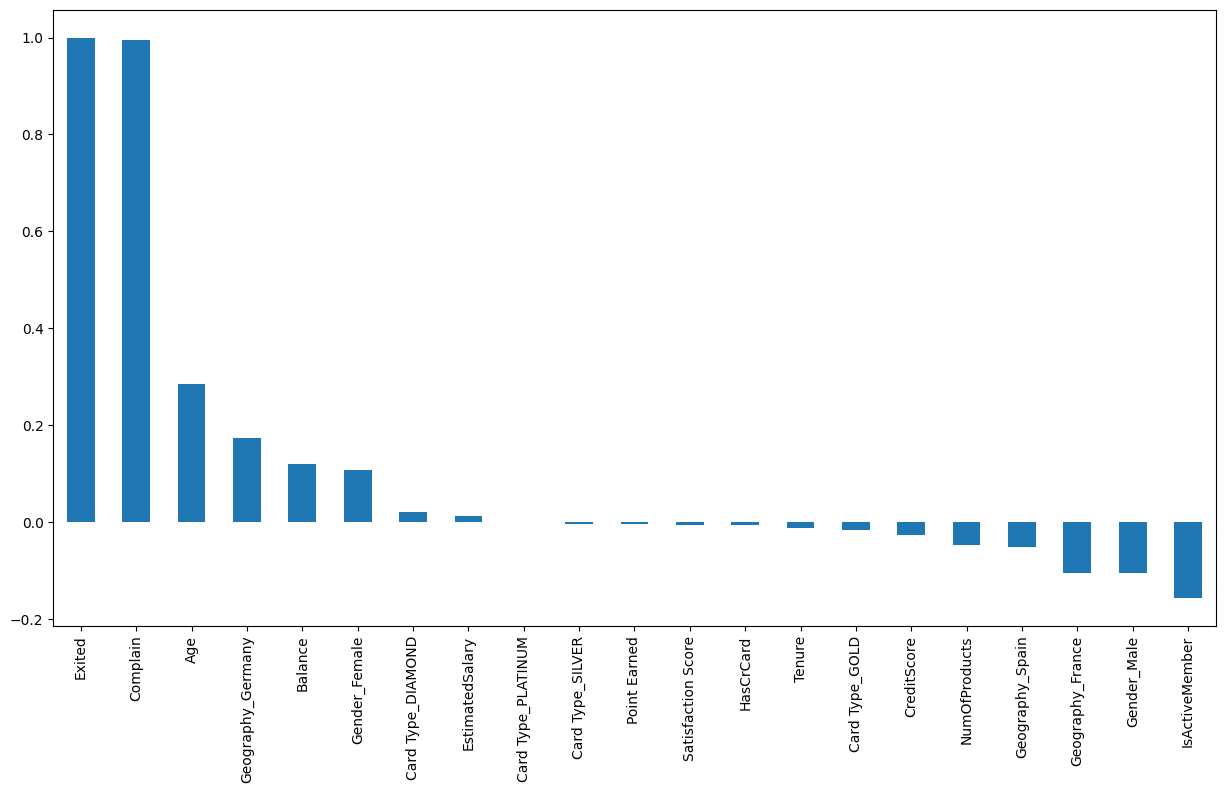

In [14]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

###해석
확인 결과 성별 남성과 스페인 및 프랑스 지역 그리고 활성 멤버 쪽의 강한 음의 선형 관계 확인함

카이제곱검정

In [18]:
def chi_square_test(data,column):
    stat,p,dof,expected=chi2_contingency(data)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Exited(타켓)과 '+ column + '간 연관성이 있음 (H0 기각)')
    else : 
        print("Exited(타켓)과 "+ column + "간 연관성이 없음 (H0 채택)")

In [19]:
def chi_square_test2(column):
    df=count_Exited(column)
    return chi_square_test(df,column)

In [21]:
def count_Exited(column):
    return df[column].value_counts()

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# 예시 데이터프레임
data = pd.read_csv('Customer-Churn-Records.csv')
    

# 특정 컬럼에 대한 'Exited' 값의 분포를 카운트하는 함수
def count_Exited(column):
    return pd.crosstab(df[column], df['Exited'])

# 카이제곱 검정을 수행하는 함수
def chi_square_test2(column):
    # count_Exited 함수 호출
    df_counts = count_Exited(column)
    
    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(df_counts)
    return chi2, p, dof, expected

# 'gender' 컬럼에 대해 테스트 실행
print(chi_square_test2('gender'))

KeyError: 'gender'

In [40]:
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


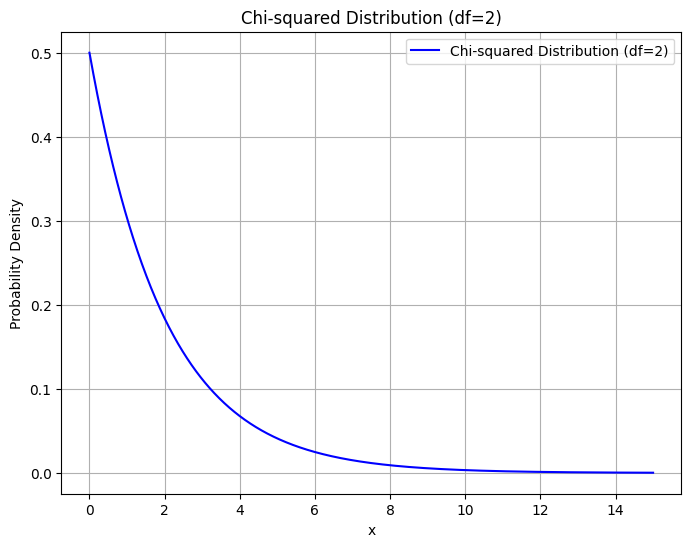

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 자유도 (Degrees of Freedom)
df = 2  # 예시로 자유도를 2로 설정

# x축 값 생성: 카이제곱 분포의 값은 0 이상이므로 0에서 15까지 범위로 설정
x = np.linspace(0, 15, 1000)

# 카이제곱 분포의 확률 밀도 함수 (PDF) 계산
y = chi2.pdf(x, df)

# 카이제곱 분포 시각화
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Chi-squared Distribution (df={df})', color='blue')

# 그래프에 제목과 레이블 추가
plt.title(f'Chi-squared Distribution (df={df})')
plt.xlabel('x')
plt.ylabel('Probability Density')

# 그래프에 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

### 상관관계 매트릭스 플롯

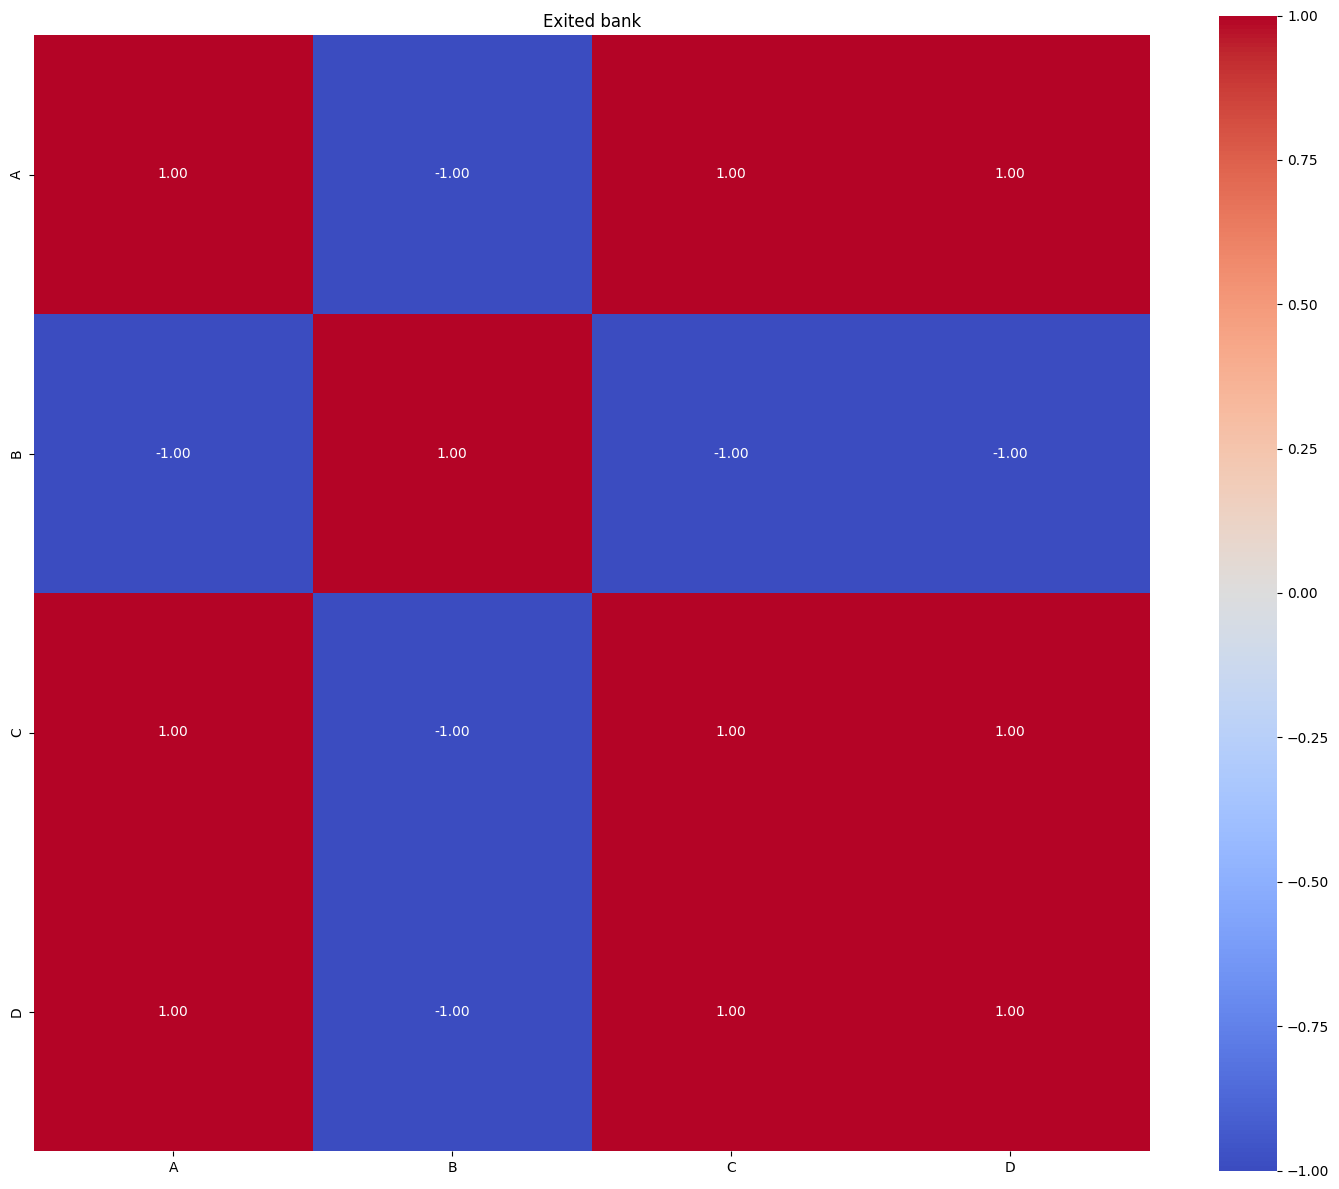

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Customer-Churn-Records.csv')

# 상관관계 계산
corr = df.corr()

# 상관관계 매트릭스 플롯 그리기
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# 그래프 제목
plt.title('Exited bank')

# 그래프 표시
plt.show()

In [31]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 8.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import xgboost as xgb
print(xgb.__version__)

2.1.3


In [34]:
pip install scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 'Exited.csv' 파일을 로드합니다. 경로는 실제 파일 경로로 변경하세요.
data = pd.read_csv('Customer-Churn-Records.csv')

# 데이터 확인 (컬럼명, 일부 데이터 등)
print(df.head())

# 필요한 피처와 레이블 분리
# 'Exited' 컬럼은 레이블 (타겟 변수)입니다.
X = df.drop(columns=['Exited'])  # 'Exited' 제외한 모든 컬럼을 특징(피처)으로 사용
y = df['Exited']  # 'Exited' 컬럼을 타겟(레이블)으로 사용

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy * 100:.2f}%")

# 모델 평가 (옵션)
# Confusion matrix나 F1 score 등도 출력 가능
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

   A  B  C  D
0  1  5  2  5
1  2  4  3  6
2  3  3  4  7
3  4  2  5  8
4  5  1  6  9


KeyError: "['Exited'] not found in axis"

In [20]:
# XGBoost 라이브러리 임포트
from xgboost import XGBClassifier

# XGBoost 분류기 생성
model = XGBClassifier()

# 학습 데이터로 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
preds = model.predict(X_test)

# 예측 결과의 정확도 계산
metrics.accuracy_score(y_test, preds)

NameError: name 'X_train' is not defined